# Problem 2: Implementing Coordinate descent

### Reference:
* https://www.kaggle.com/mcweng24/lasso-regression-using-numpy
* https://xavierbourretsicotte.github.io/coordinate_descent.html

### Some notations:
**$n$** - number of observations, **$d$** - number of features

### Lasso cost function

\begin{equation*}
\large{L(w) = \frac{1}{2} \Sigma_{i=1}^{n}(y_{i} - \Sigma_{j=0}^{d}{w_{j}x_{ij}})^2 + \lambda\Sigma_{j=0}^{d}\lvert w_{j} \rvert}
\end{equation*}

Taking the derivative with respect to the $w_{l}$

\begin{equation*}
\large{\frac{\partial L}{\partial w_{l}} = \Sigma_{i=1}^{n}(y_{i} - \Sigma_{j=0}^{d}{w_{j}x_{ij}}) \cdot x_{il} + \lambda \frac{\partial \lvert w_{l} \rvert}{\partial w_{l}}}
\end{equation*}

Can be rewritten as:
\begin{equation*}
\large{\frac{\partial L}{\partial w_{l}} = \Sigma_{i=1}^{n}(y_{i} - \Sigma_{j \neq l}^{d}{w_{j}x_{ij}} - w_{l}x_{il}) \cdot x_{il} + \lambda \frac{\partial \lvert w_{l} \rvert}{\partial w_{l}}}
\end{equation*}

\begin{equation*}
\large{\frac{\partial L}{\partial w_{l}} = \Sigma_{i=1}^{n}(y_{i} - \Sigma_{j \neq l}^{d}{w_{j}x_{ij}}) \cdot x_{il} +   w_{l}\Sigma_{i=1}^{n}x_{il}^2 + \lambda \frac{\partial \lvert w_{l} \rvert}{\partial w_{l}}}
\end{equation*}

let 
$$
\large{a_{l} = \Sigma_{i=1}^{n}x_{il}^2}
$$
which, in case of normalized features,
$$
\large{a_{l} = \Sigma_{i=1}^{n}x_{il}^2 = 1}
$$

and let,
$$
\large{\rho_{l} = \Sigma_{i=1}^{n}(\Sigma_{j \neq l}^{d}{w_{j}x_{ij}} -y_{i}) \cdot x_{il}}
$$

with $\rho_{l}$ basically a function of the prediction without the feature $l$.

Ignoring the constant 2, we can rewrite
\begin{equation*}
\large{\frac{\partial L}{\partial w_{l}} = \rho_{l} + w_{l}a_{l} + \lambda \frac{\partial \lvert w_{l} \rvert}{\partial w_{l}}}
\end{equation*}

### The final partial derivative equation:

$$
\large{
\frac{\partial L}{\partial w_{l}} = \left\{
    \begin{array}\\
        \rho_{l} + w_{l}a_{l} + \lambda & \mbox{if } \  w_{l} > 0 \\
        [\rho_{l} - \lambda, \rho_{l} + \lambda] & \mbox{if } \  w_{l} = 0 \\
        \rho_{l} + w_{l}a_{l} - \lambda & { w_{l} < 0}
    \end{array}
\right.
}
$$

### Soft threshold function 

#### The closed form solution, for the normalized features 


$$
\large{
\left\{
    \begin{array}\\
        w_{l} =  \rho_{l} + \lambda & \mbox{for } \  \rho_{l} < -\lambda \\
        w_{l} =  0 & \mbox{for } \  -\lambda \leq \rho_{l} \leq -\lambda \\
        w_{l} =  \rho_{l} - \lambda & \mbox{for } \  \rho_{l} > -\lambda \\
    \end{array}
\right.
}
$$

In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from sklearn import linear_model
from sklearn import datasets

%matplotlib inline
plt.style.use('seaborn-white')

## Load Data

In [15]:
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target.reshape(-1,1)

In [16]:
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target.reshape(-1,1)

## Define Soft threshold

In [ ]:
def soft_threshold(rho,lamda):
    '''Soft threshold function used for normalized data and lasso regression'''
    if rho < - lamda:
        return (rho + lamda)
    elif rho >  lamda:
        return (rho - lamda)
    else: 
        return 0
    

## Define Coordnate descent

In [19]:
def coordinate_descent(theta,X,y,lamda = .01, num_iters=100, intercept = False):
    '''Coordinate gradient descent for lasso regression - for normalized data. 
    The intercept parameter allows to specify whether or not we regularize theta_0'''
    
    #Initialisation of useful values 
    m,n = X.shape
    X = X / (np.linalg.norm(X,axis = 0)) #normalizing X in case it was not done before
    
    #Looping until max number of iterations
    for i in range(num_iters): 
        
        #Looping through each coordinate
        for j in range(n):
            
            #Vectorized implementation
            X_j = X[:,j].reshape(-1,1)
            y_pred = X @ theta
            rho = X_j.T @ (y - y_pred  + theta[j]*X_j)
        
            #Checking intercept parameter
            if intercept == True:  
                if j == 0: 
                    theta[j] =  rho 
                else:
                    theta[j] =  soft_threshold(rho, lamda)  

            if intercept == False:
                theta[j] =  soft_threshold(rho, lamda)   
            
    return theta.flatten()

## Run Lasso

In [ ]:
# Initialize variables
m,n = X.shape
initial_theta = np.ones((n,1))
theta_list = list()
lamda = np.logspace(0,4,300)/10 #Range of lambda values

#Run lasso regression for each lambda
for l in lamda:
    theta = coordinate_descent(initial_theta,X,y,lamda = l, num_iters=100)
    theta_list.append(theta)

#Stack into numpy array
theta_lasso = np.stack(theta_list).T

## Plot paths

(0.06309573444801933, 1584.893192461114, -849.8147108555953, 820.6104516733536)

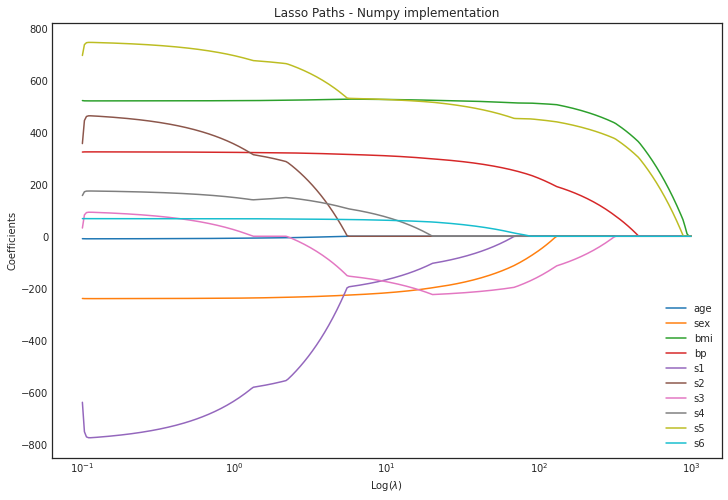

In [20]:
n,_ = theta_lasso.shape
plt.figure(figsize = (12,8))

for i in range(n):
    plt.plot(lamda, theta_lasso[i], label = diabetes.feature_names[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('Coefficients')
plt.title('Lasso Paths - Numpy implementation')
plt.legend()
plt.axis('tight')